# Подготовка модели распознавания рукописных букв и цифр

Вам предстоит самостоятельно обучить модель для задачи распознавания рукописных букв и цифр с помощью датасета `emnist`. Результатом должна быть обученная модель, сохранённая в файл `model.pkl`.

Можете воспользоваться предложенным порядком действий и подсказками из этого ноутбука или подойти к решению задачи самостоятельно и написать всё с нуля. То же касается и процесса упаковки модели в сервис для распознавания самостоятельно написанных символов.

В этом ноутбуке комментариями и символами `...` отмечены места для вашего кода.

Перед отправкой решения убедитесь, что все ячейки ноутбука выполняются последовательно без ошибок, если запустить `Kernel -> Restart & Run All`.

Успехов!

### 1. Установите и импортируйте необходимые библиотеки

In [1]:
# !pip install emnist
# your pip installs here

In [2]:
import os
import pickle
import emnist

In [3]:
# your imports here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

c:\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2. Загрузите датасет и проанализируйте его

Датасет в качестве лейблов (или таргетов) содержит числа от 0 до 46. Каждому числу соответствует ASCII-код некоторого символа. Пары «лейбл — код» хранятся в файле `emnist-balanced-mapping.txt`.
Выведите на экран количество семплов в каждом сплите датасета и размер изображений. Также для каждого лейбла выведите соответствующий ему символ и количество тренировочных семплов, приходящееся на него.
Посмотрите на несколько примеров изображений.

_Подсказка: чтобы получить символ из ASCII-кода, нужно воспользоваться функцией_ `chr()`. _Для вашего удобства можно построить словарь_ (`dict`) _соответствий._

In [4]:
images_train, labels_train = emnist.extract_training_samples('balanced')
images_test, labels_test = emnist.extract_test_samples('balanced')

print(f'Train: {len(images_train)} samples')
print(f'Test: {len(images_test)} samples')
print(f'Image size: {images_train[0].shape}')
print("Number of classes:", len(np.unique(images_train)))
images_train.shape, labels_train.shape, images_test.shape, labels_test.shape

Train: 112800 samples
Test: 18800 samples
Image size: (28, 28)
Number of classes: 256


((112800, 28, 28), (112800,), (18800, 28, 28), (18800,))

In [5]:
# Создаем словарь соответствия лейблов и символов ASCII
label_mapping = {}
with open('emnist-balanced-mapping.txt', 'r') as file:
    for line in file:
        label, ascii_code = map(int, line.strip().split())
        label_mapping[label] = chr(ascii_code)

label_mapping   

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [6]:
# Выводим символы и количество тренировочных семплов для каждого лейбла
print("\nСимволы и количество тренировочных семплов для каждого лейбла:")
for label, symbol in label_mapping.items():
    num_samples = sum(labels_train == label)
    print(f"Лейбл: {label}, Символ: {symbol}, Количество семплов: {num_samples}")


Символы и количество тренировочных семплов для каждого лейбла:
Лейбл: 0, Символ: 0, Количество семплов: 2400
Лейбл: 1, Символ: 1, Количество семплов: 2400
Лейбл: 2, Символ: 2, Количество семплов: 2400
Лейбл: 3, Символ: 3, Количество семплов: 2400
Лейбл: 4, Символ: 4, Количество семплов: 2400
Лейбл: 5, Символ: 5, Количество семплов: 2400
Лейбл: 6, Символ: 6, Количество семплов: 2400
Лейбл: 7, Символ: 7, Количество семплов: 2400
Лейбл: 8, Символ: 8, Количество семплов: 2400
Лейбл: 9, Символ: 9, Количество семплов: 2400
Лейбл: 10, Символ: A, Количество семплов: 2400
Лейбл: 11, Символ: B, Количество семплов: 2400
Лейбл: 12, Символ: C, Количество семплов: 2400
Лейбл: 13, Символ: D, Количество семплов: 2400
Лейбл: 14, Символ: E, Количество семплов: 2400
Лейбл: 15, Символ: F, Количество семплов: 2400
Лейбл: 16, Символ: G, Количество семплов: 2400
Лейбл: 17, Символ: H, Количество семплов: 2400
Лейбл: 18, Символ: I, Количество семплов: 2400
Лейбл: 19, Символ: J, Количество семплов: 2400
Лейбл:

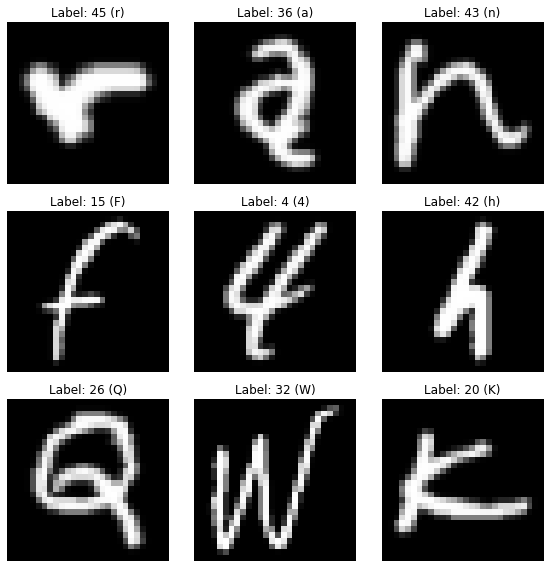

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images_train[i], cmap='gray')
    ax.set_title(f"Label: {labels_train[i]} ({label_mapping[labels_train[i]]})")
    ax.axis('off')

plt.tight_layout()
plt.show()

### 3. Подготовьте датасет для обучения и валидации

_Подсказка: чтобы вытянуть изображения в вектор, понадобится метод_ `reshape` _из библиотеки_ `numpy`.

In [8]:
# преобразование каждого изображения в вектор и нормализацию значений пикселей в каждом изображении.
images_train = np.array(images_train)
images_test = np.array(images_test)

X_train = images_train.reshape(images_train.shape[0], -1)
y_train = labels_train
X_test = images_test.reshape(images_test.shape[0], -1)
y_test = labels_test

print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (112800, 784)
Test: (18800, 784)


### 4. Выберите модель, обучите её, протестируйте и сохраните
Выведите и проанализируйте матрицу ошибок. Какие два символа она чаще всего путает? На каком символе модель чаще всего ошибается?
Выведите на экран точность вашей модели. 

In [9]:
import lightgbm as lgb

c:\Python310\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 13.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [10]:
model = lgb.LGBMClassifier(max_depth=5, n_estimators=300, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, min_child_samples=30)

#  # Максимальное количество листьев на дереве. Увеличение этого параметра может помочь модели лучше обучаться, но может привести к переобучению.
#     'num_leaves'

#     # Максимальная глубина дерева. Ограничение глубины деревьев может помочь избежать переобучения.
#     'max_depth'

#     # learning_rate: Скорость обучения. Уменьшение скорости обучения и увеличение числа итераций (n_estimators) могут улучшить качество модели.
#     'learning_rate'

#     # Количество деревьев. Увеличение числа деревьев может улучшить точность модели, но это также увеличит время обучения.
#     'n_estimators'

#     # Минимальное количество образцов в узле. Увеличение этого параметра может помочь избежать переобучения.
#     'min_child_samples'

#     # Доля случайно отбираемых данных для обучения каждого дерева. Это помогает избежать переобучения.
#     'subsample'

#     # Доля случайно отбираемых признаков для каждого дерева. Это также помогает избежать переобучения.
#     'colsample_bytree'


In [11]:
model.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=5,
               min_child_samples=30, n_estimators=300, subsample=0.8)

In [12]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Оценка модели
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Train Accuracy:', accuracy_train)
print('Test Accuracy:', accuracy_test)

Train Accuracy: 0.9849202127659574
Test Accuracy: 0.8220744680851064


In [13]:
# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Вывод матрицы ошибок
print("\nМатрица ошибок:")
print(conf_matrix)


Матрица ошибок:
[[278   0   0 ...   1   0   1]
 [  0 257   1 ...   1   0   4]
 [  0   0 336 ...   1   0   0]
 ...
 [  0   0   1 ... 212   0   5]
 [  0   0   0 ...   0 367   3]
 [  1   3   0 ...   0   5 333]]


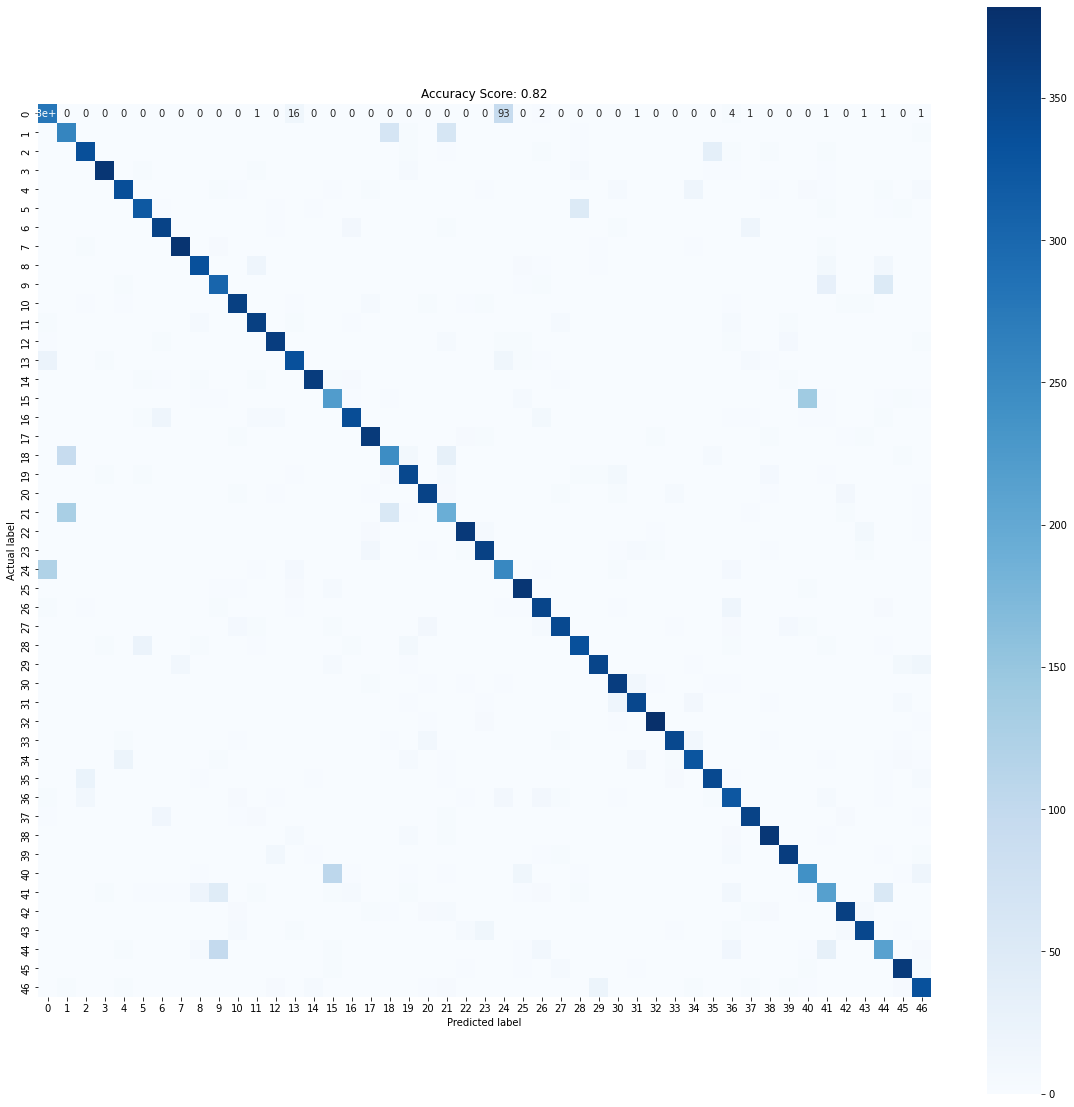

In [14]:

plt.figure(figsize=[20,20])
sns.heatmap(conf_matrix, annot=True, square=True, cmap='Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Accuracy Score: {accuracy_test:.2f}')
plt.show()

In [15]:
most_confused_symbols = np.unravel_index(np.argmax(conf_matrix - np.eye(conf_matrix.shape[0]) * conf_matrix.max()), conf_matrix.shape)
symbol_1 = most_confused_symbols[0]
symbol_2 = most_confused_symbols[1]
print("\nСимволы, которые чаще всего путаются между собой:", symbol_1, "и", symbol_2)

# Находим символ, на котором модель чаще всего ошибается
most_mistaken_symbol = np.argmax(np.sum(conf_matrix, axis=1))
print("\nСимвол, на котором модель чаще всего ошибается:", most_mistaken_symbol)


Символы, которые чаще всего путаются между собой: 15 и 40

Символ, на котором модель чаще всего ошибается: 0


In [16]:
with open(os.path.join('myapp', 'model.pkl'),'wb') as f:
    pickle.dump(model, f)